In [74]:
import numpy as np

In [75]:
# https://web.eecs.umich.edu/~justincj/teaching/eecs442/notes/linear-backprop.html

In [76]:
class Linear:
    def __init__(self, num_in, num_out, use_bias = True) -> None:
        self.use_bias = use_bias
        self.num_in = num_in
        self.num_out = num_out
        self.matr = np.random.normal(0, 1., (num_in + (1 if use_bias else 0), num_out))
        self.grads = np.zeros_like(self.matr)
        self.last_xs = None

    def get_grad(self, upstream_resp_loss: np.ndarray) -> np.ndarray:
        # divvy up the blame!
        # except now, just do it with the last inputs

        # the loss 'attributed' that we will pass up, (the loss 'attributed' to inputs) is proportonial to the weight mat
        if not self.use_bias:
            dloss_din = upstream_resp_loss @ self.matr.T
        else:
            # chop off the bias!
            dloss_din = upstream_resp_loss @ self.matr[:-1, :].T

        # the loss 'attributed' to the weights is directly proportional to the inputs we recieved
        dloss_dweights = self.last_xs.T @ upstream_resp_loss

        assert self.grads.shape == dloss_dweights.shape
        self.grads = dloss_dweights

        return dloss_din

    def forward(self, xs: np.ndarray, no_record: bool = False) -> np.ndarray:
        # fix xs, if we need bias
        fixed_xs = xs
        if self.use_bias:
            fixed_xs = np.hstack((fixed_xs, np.ones((fixed_xs.shape[0], 1))))
        
        if not no_record:
            self.last_xs = fixed_xs
        
        return fixed_xs @ self.matr

In [77]:
class LinearPercepFused(Linear):
    def forward(self, xs: np.ndarray, no_record: bool = False) -> np.ndarray:
        outp = super().forward(xs, no_record)
        return np.where(outp > 0., 1., 0.)

In [78]:
class MSELoss:
    def __init__(self) -> None:
        self.last_diffs = None

    def get_grad(self) -> np.ndarray:
        return 2.*self.last_diffs/len(self.last_diffs)

    def forward(self, y: np.ndarray, y_exp) -> np.ndarray:
        self.last_diffs = y - y_exp
        return np.mean(self.last_diffs**2)

In [79]:
# xs = np.linspace(-10, 10, 1000)
# ys = xs*10 + 2
# xs += np.random.normal(0.,.1, len(xs))

# xs = xs.reshape(-1, 1)
# ys = ys.reshape(-1, 1)

xs = np.array([[0., 0.], [0., 1.], [1., 0.], [1., 1.]])
# ys = np.array([[0.], [1.], [1.], [0.]])
ys = np.array([[0.], [0.], [1.], [0.]])


In [80]:
xs_repeat = xs.repeat(10, 0)
ys_repeat = ys.repeat(10, 0)
ys_repeat += np.random.normal(0, .01, size=ys_repeat.shape)

In [81]:
import matplotlib.pyplot as plt

In [82]:
LR = .001

In [83]:
from tqdm import tqdm

In [84]:
def get_random_range(lenx, seq_len):
    start_i = np.random.randint(0, lenx-seq_len)
    return start_i, start_i + seq_len

In [85]:
def shuffle(arrs):
    for arr in arrs:
        assert len(arr) == len(arrs[0]), "All arrays should be the same length"
    idxs = np.arange(0, len(arr))
    np.random.shuffle(idxs)
    reindexed = [arr[idxs] for arr in arrs]
    return reindexed

In [86]:
get_random_range(len(xs_repeat), 10)

(19, 29)

In [87]:
xs_repeat_shuff, ys_repeat_shuff = shuffle([xs_repeat, ys_repeat])

 21%|██        | 630/3000 [00:00<00:00, 5888.47it/s]

loss=9.52200621324153e-05
loss=0.00010548982569507398
loss=0.998600964923003
loss=1.9689755879356124e-05
loss=1.011235117268376
loss=1.0088599666478446
loss=4.086984414386471e-05
loss=0.9993374340456674
loss=0.9967967724285439
loss=0.9612561240865912
loss=0.9920307977729171
loss=0.9920307977729171
loss=0.998600964923003
loss=0.9912975437348155
loss=0.998600964923003
loss=0.9993374340456674
loss=0.9963180220776156
loss=1.0060324568571726
loss=0.00010548982569507398
loss=0.00010548982569507398
loss=1.9689755879356124e-05
loss=0.9912975437348155
loss=0.9848658129786835
loss=1.0071922447930077
loss=0.998600964923003
loss=0.9801746096507152
loss=1.0102319669378976
loss=1.011235117268376
loss=0.00015569808698401899
loss=0.9920307977729171
loss=0.9875150028422978
loss=0.9931222673605382
loss=1.020842669807797
loss=1.011235117268376
loss=1.0071922447930077
loss=0.00015569808698401899
loss=1.0102319669378976
loss=0.9950723546952549
loss=0.9986310951061913
loss=1.020842669807797
loss=1.007192244

 57%|█████▋    | 1699/3000 [00:00<00:00, 4608.21it/s]


loss=5.769834524770759e-05
loss=1.2885798891598638e-05
loss=1.222843618733929e-05
loss=1.901601970401919e-05
loss=3.1380927001757055e-05
loss=0.0006754514804285574
loss=0.9795638418202331
loss=0.00010135180444661655
loss=0.9993052094842526
loss=3.1380927001757055e-05
loss=2.569283368601133e-06
loss=1.901601970401919e-05
loss=1.222843618733929e-05
loss=1.008894317833575
loss=0.9993374340456674
loss=1.594062659842408e-05
loss=1.2885798891598638e-05
loss=1.0435521936144674
loss=1.020842669807797
loss=0.0001705568477931843
loss=1.222843618733929e-05
loss=0.9993717458112975
loss=1.0060324568571726
loss=4.687960756367789e-07
loss=9.92478013585184e-05
loss=1.1866644573645321e-05
loss=0.00010748695201567321
loss=0.00012299407474021786
loss=3.1380927001757055e-05
loss=0.00010748695201567321
loss=4.896673775291616e-07
loss=1.0128267752315405
loss=0.00010548982569507398
loss=9.870684033427433e-08
loss=0.9912975437348155
loss=4.896673775291616e-07
loss=5.769834524770759e-05
loss=1.594062659842408

 75%|███████▌  | 2261/3000 [00:00<00:00, 4958.64it/s]


loss=0.9993717458112975
loss=0.9912975437348155
loss=0.00010748695201567321
loss=1.3038973504879736e-05
loss=1.0978478380332813e-07
loss=1.1866644573645321e-05
loss=0.0001705568477931843
loss=3.1380927001757055e-05
loss=1.594062659842408e-05
loss=1.594062659842408e-05
loss=9.070296415079012e-06
loss=0.00024194199739525988
loss=1.0036610658895269
loss=0.9887200758161786
loss=4.687960756367789e-07
loss=1.0978478380332813e-07
loss=4.896673775291616e-07
loss=0.0006754514804285574
loss=0.00012299407474021786
loss=4.687960756367789e-07
loss=4.687960756367789e-07
loss=3.1380927001757055e-05
loss=1.0128267752315405
loss=0.9848658129786835
loss=0.00010748695201567321
loss=0.00038272267935991175
loss=0.00010748695201567321
loss=6.085424727736128e-06
loss=3.921396606819363e-05
loss=0.999722515974403
loss=0.9912975437348155
loss=1.222843618733929e-05
loss=8.683355658676253e-06
loss=1.3038973504879736e-05
loss=8.683355658676253e-06
loss=2.604023496640149e-05
loss=0.00024194199739525988
loss=1.0435

100%|██████████| 3000/3000 [00:00<00:00, 4999.90it/s]

loss=1.9689755879356124e-05
loss=1.9252017271674348e-08
loss=0.0004641449837018064
loss=0.00024194199739525988
loss=1.1866644573645321e-05
loss=1.2072540827110869e-07
loss=1.594062659842408e-05
loss=1.1866644573645321e-05
loss=1.3038973504879736e-05
loss=4.086984414386471e-05
loss=1.953829337263802e-05
loss=1.594062659842408e-05
loss=1.3038973504879736e-05
loss=3.19898497758734e-05
loss=9.870684033427433e-08
loss=0.00010748695201567321
loss=4.687960756367789e-07
loss=3.19898497758734e-05
loss=4.086984414386471e-05
loss=9.870684033427433e-08
loss=6.085424727736128e-06
loss=8.683355658676253e-06
loss=2.604023496640149e-05
loss=3.19898497758734e-05
loss=1.9689755879356124e-05
loss=0.00015569808698401899
loss=1.2885798891598638e-05
loss=2.569283368601133e-06
loss=0.00010748695201567321
loss=1.3038973504879736e-05
loss=1.0978478380332813e-07
loss=3.344731018350167e-06
loss=1.2885798891598638e-05
loss=1.3038973504879736e-05
loss=0.00010135180444661655
loss=3.921396606819363e-05
loss=1.968975

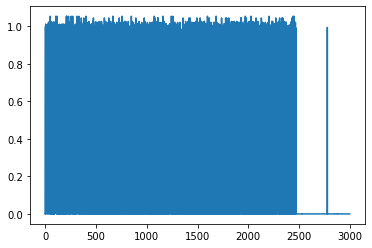

In [88]:
lin1 = LinearPercepFused(2, 5, use_bias=True)
lin2 = LinearPercepFused(5, 1, use_bias=True)
lossf = MSELoss()

losses = []
for _ in tqdm(range(3000)):
    starti, endi = get_random_range(len(xs_repeat_shuff), 1)
    out_l1 = lin1.forward(xs_repeat_shuff[starti:endi])
    out = lin2.forward(out_l1)

    loss = lossf.forward(out, ys_repeat_shuff[starti:endi])
    print(f"{loss=}")
    
    pass_back_grad = lossf.get_grad()
    pass_back_grad = lin2.get_grad(pass_back_grad)
    pass_back_grad = lin1.get_grad(pass_back_grad)

    lin1.matr += lin1.grads*-LR
    lin2.matr += lin2.grads*-LR
    losses.append(loss)
import matplotlib.pyplot as plt
plt.plot(losses)

In [89]:
out_l1 = lin1.forward(xs, True)
out = lin2.forward(out_l1, True)
out

array([[0.],
       [0.],
       [1.],
       [0.]])

In [90]:
sxs, sys = np.meshgrid(*[np.linspace(-2, 2, 202) for _ in range(2)])

In [91]:
pts = np.vstack([sxs.ravel(), sys.ravel()]).T

In [92]:
import matplotlib.pyplot as plt

In [93]:
out_l1 = lin1.forward(pts, True)
out = lin2.forward(out_l1, True)
out

array([[1.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [94]:
print(f"{out.min()=}, {out.max()=}")

out.min()=0.0, out.max()=1.0


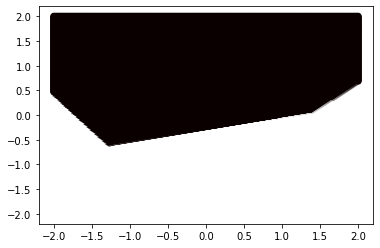

In [95]:
plt.scatter(pts[:, 0], pts[:, 1], c=out, cmap="hot")